## 1. <a>Import Libraries</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest


from sklearn.metrics import silhouette_score

warnings.filterwarnings("ignore")

## 2. <a >Read Dataset</a>

First download the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data.

In [2]:
#read the data
data_path = '../Data/CC GENERAL.csv' 
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## - Data Fields

- <b>CUSTID :</b> Identification of Credit Card holder (Categorical)
- <b>BALANCE :</b> Balance amount left in their account to make purchases (
- <b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- <b>PURCHASES : </b> Amount of purchases made from account
- <b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go
- <b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment
- <b>CASHADVANCE :</b> Cash in advance given by the user
- <b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 not frequently purchased)
- <b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- <b>PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- <b>CASHADVANCEFREQUENCY : </b> How frequently the cash in advance being paid
- <b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"
- <b>PURCHASESTRX :</b> Numbe of purchase transactions made
- <b>CREDITLIMIT :</b> Limit of Credit Card for user
- <b>PAYMENTS :</b> Amount of Payment done by user
- <b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user
- <b>PRCFULLPAYMENT :</b> Percent of full payment paid by user
- <b>TENURE :</b> Tenure of credit card service for user

## 3. <a name="2">Data investigation</a>

I will check the data quality and assess any issues in the data as:
- null values in each column 
- duplicate rows
- each column has the proper data type
- distribution for each column (skewness)
- outliers

In [3]:
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

* <b>From data info we notice that:</b>
- (CREDIT_LIMIT, MINIMUM_PAYMENTS) have missing values.
- (CUST_ID)object type and all other columns numerical type.

#### • Null Values 


In [5]:
# check number of nulls in each column 
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [6]:
# konw the ratio of null in each column 
round(df.isnull().sum(axis=0)*100/df.shape[0],2).sort_values(ascending=False)

MINIMUM_PAYMENTS                    3.50
CREDIT_LIMIT                        0.01
CUST_ID                             0.00
BALANCE                             0.00
PRC_FULL_PAYMENT                    0.00
PAYMENTS                            0.00
PURCHASES_TRX                       0.00
CASH_ADVANCE_TRX                    0.00
CASH_ADVANCE_FREQUENCY              0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_FREQUENCY                 0.00
CASH_ADVANCE                        0.00
INSTALLMENTS_PURCHASES              0.00
ONEOFF_PURCHASES                    0.00
PURCHASES                           0.00
BALANCE_FREQUENCY                   0.00
TENURE                              0.00
dtype: float64

In [7]:
# This will print basic statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


#### • Duplicate Rows

In [8]:
# check if there is any rows duplicated 
df[df.duplicated()]
# We notice that there's no duplicated in the data 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


#### • check that each column has the proper data type

In [9]:
# save numeric columns and objects in separeted list to handle each one of them
numeric_columns = df.select_dtypes(exclude=['object']).columns.to_list() # take any column not from type obj.
object_columns = df.select_dtypes(include=['object']).columns.to_list()

In [10]:
print("•Numerical Columns are :\n",numeric_columns,"\n")
print('--'*50)
print("•Object Columns are :\n",object_columns)

•Numerical Columns are :
 ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'] 

----------------------------------------------------------------------------------------------------
•Object Columns are :
 ['CUST_ID']


#### • Distribution for each Feature

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

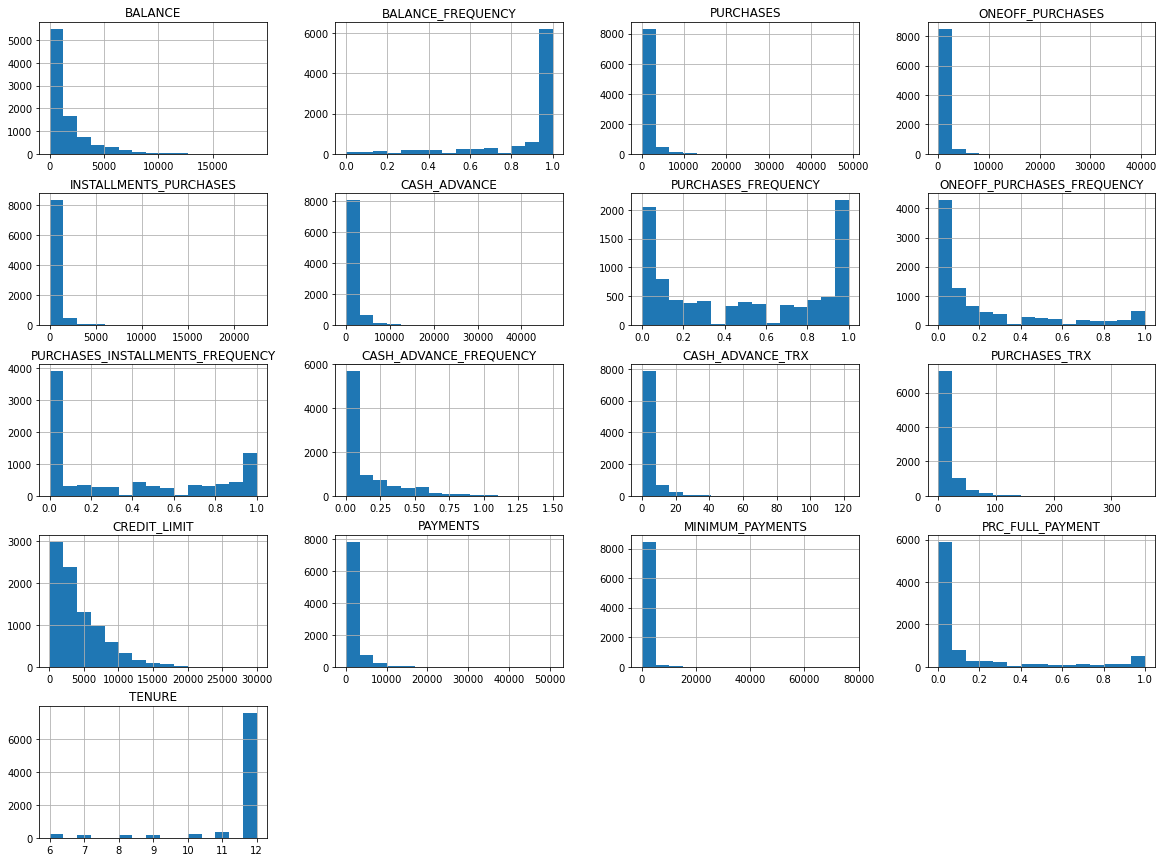

In [11]:
# see distribution of each column 
df[numeric_columns].hist(bins=15, figsize=(20,15))
# we can notice that there is a right skewed in the data

In [12]:
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

#### • Correlation between features

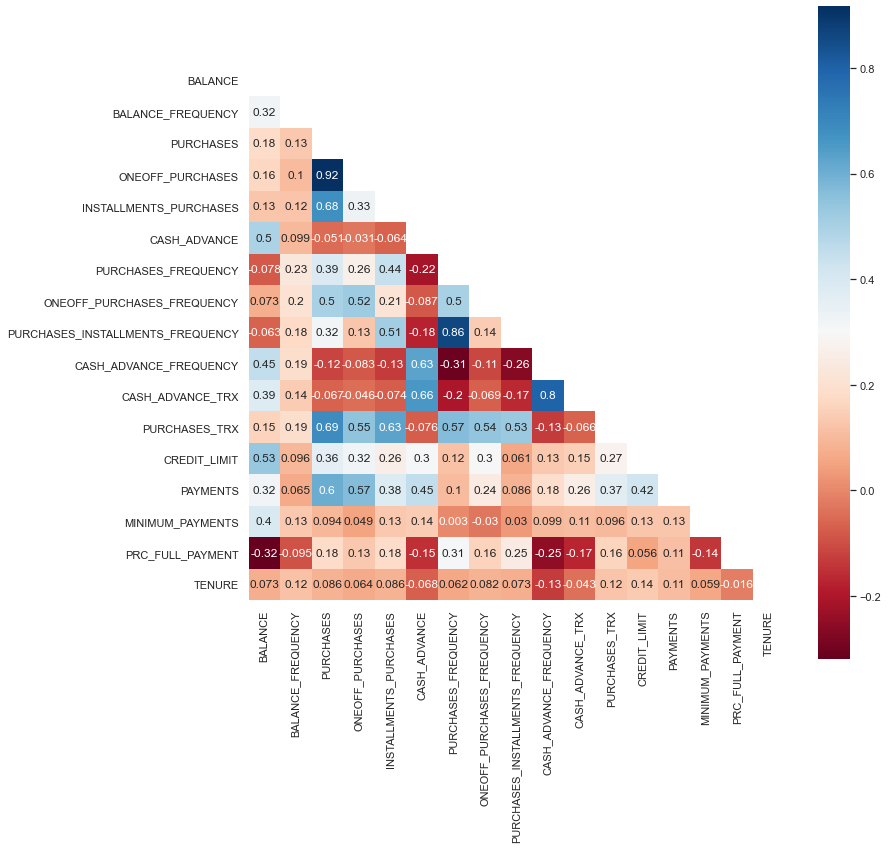

In [13]:
import seaborn as sns
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(12,12)}) # handle size of thr figure 
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr_matrix, mask=mask ,annot=True, cmap= 'RdBu', square=True);


#### • Outliers

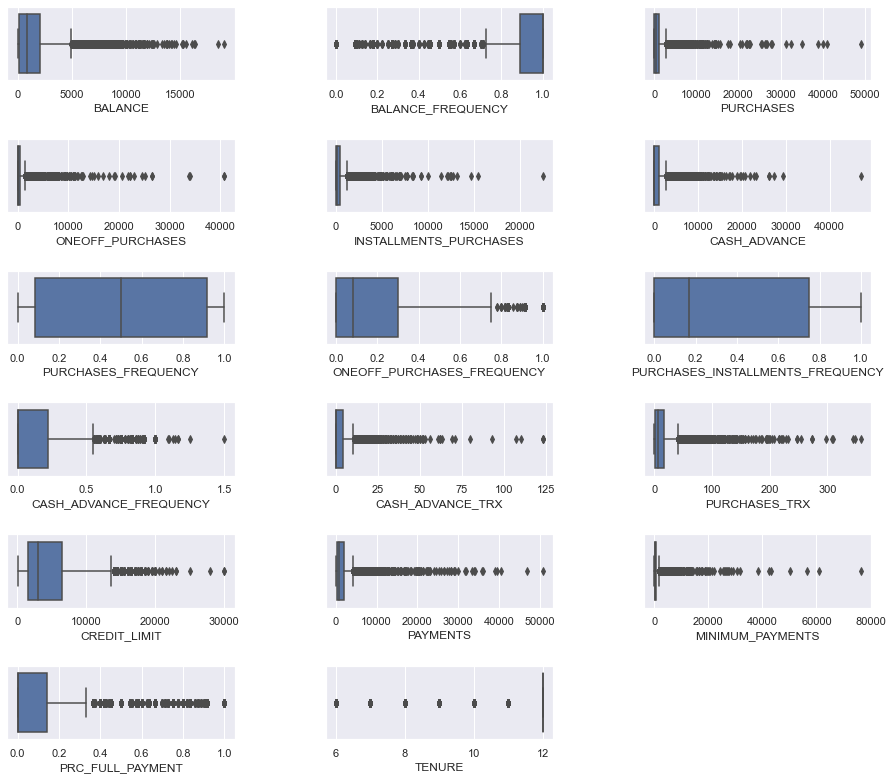

In [14]:
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(df[column])

In [15]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
#calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = df[(df < LB) | (df > UB)].count()
print('Number of Outliers at each column:')
pd.DataFrame(No_Outliers, columns=['No. Outliers'])

Number of Outliers at each column:


,No. Outliers
CUST_ID,0
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0


## 3. <a name="3">Data preprocessing</a>


### Define below all the issues that I have found in the previous part and will handle it
1- Deal with categorical columns         <br>
2- Handle missing values        <br>
3- Handle Outliers and Skewness in the data        <br>

In [16]:
#make a copy for the original dataset
df_pre=df.copy()

###  Deal with categorical columns

In [17]:
# When we check object columns in the data, we found 1 column with type object
print('Columns Type Object:',object_columns)

Columns Type Object: ['CUST_ID']


In [18]:
# drop column of id
df_pre.drop(object_columns, axis=1, inplace=True)
df_pre.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [19]:
columns_names = list(df_pre.columns)
columns_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

### Handle missing values


We have 2 Numerical columns contain missing values 

In [20]:
from sklearn.impute import SimpleImputer
#df_NoNull = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df_pre), columns=columns_names)
df_NoNull = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df_pre), columns=columns_names)
df_NoNull 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.343947,0.000000,6.0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,6.0


In [21]:
# Check columns after we handle missing values in the data
df_NoNull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

Now, there isn't nulls in the data

### Handeling outliers
Outlier is an observation in a given dataset that lies far from the rest of the observations. That means an outlier is vastly larger or smaller than the remaining values in the set.

- <b>Quantile Transformer Scaler:</b>
The Quantile Transformer Scaler converts the variable distribution to a normal distribution, and scales it 

- <b> Log Transform:</b>
It is primarily used to convert a skewed distribution to a normal distribution/less-skewed distribution. we cannot apply log transform directly – since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data.

### Log Transform

In [22]:
# will add 1 to all values because log transform get error for numbers between 0 and 1
df_pre2 = (df_NoNull + 1) 
df_log = np.log(df_pre2)
df_log.describe().T


,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,6.161637,2.013303,0.000000,4.861995,6.773521,7.628099,9.854515
BALANCE_FREQUENCY,8950.0,0.619940,0.148590,0.000000,0.635989,0.693147,0.693147,0.693147
PURCHASES,8950.0,4.899647,2.916872,0.000000,3.704627,5.892417,7.013133,10.800403
ONEOFF_PURCHASES,8950.0,3.204274,3.246365,0.000000,0.000000,3.663562,6.360274,10.615512
INSTALLMENTS_PURCHASES,8950.0,3.352403,3.082973,0.000000,0.000000,4.499810,6.151961,10.021315
CASH_ADVANCE,8950.0,3.319086,3.566298,0.000000,0.000000,0.000000,7.016449,10.760839
PURCHASES_FREQUENCY,8950.0,0.361268,0.277317,0.000000,0.080042,0.405465,0.650588,0.693147
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.158699,0.216672,0.000000,0.000000,0.080042,0.262364,0.693147
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.270072,0.281852,0.000000,0.000000,0.154151,0.559616,0.693147
CASH_ADVANCE_FREQUENCY,8950.0,0.113512,0.156716,0.000000,0.000000,0.000000,0.200671,0.916291


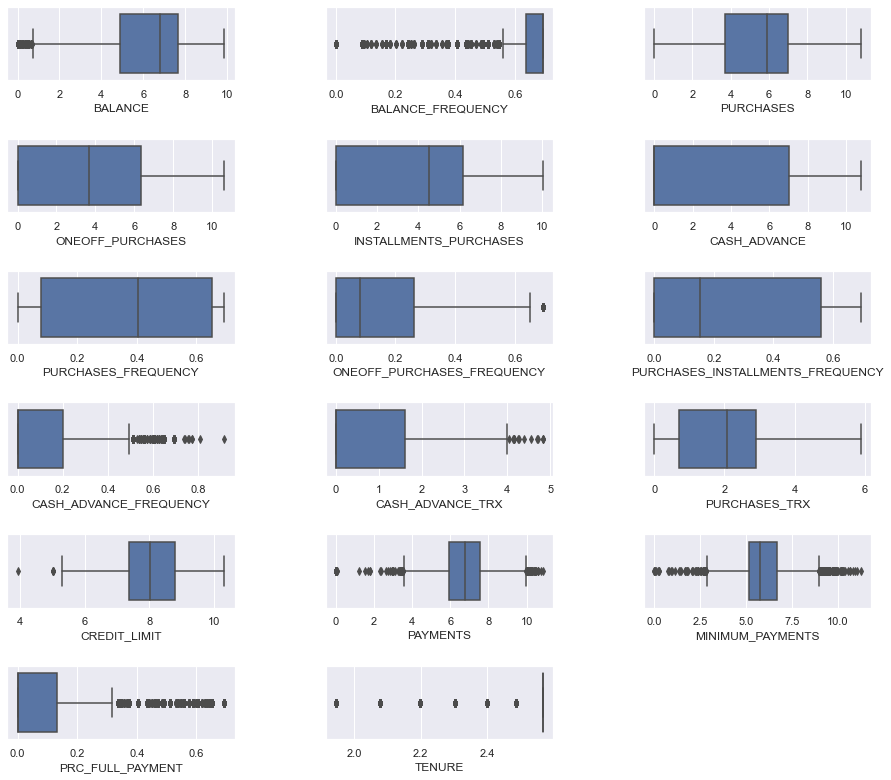

In [23]:
f, axs = plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(df_log.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(df_log[column])

In [24]:
##### SAVE DATA processing by LOG  #####
# Save DataFrame in the file
df_log.to_csv("../Data/Data_Log.csv",index=False)
########################################

In [25]:
df_pre2 = df_NoNull.copy()

In [26]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer 
#df_pre2 = QuantileTransformer(output_distribution="normal").fit_transform(df_pre2)
df_power = PowerTransformer(method="yeo-johnson").fit_transform(df_pre2)  # box-cox --> with only positive values, #Yeo-Johnson works with both positive and negative values.
#df_pre2 = np.sqrt(df_pre2)


In [27]:
df_power= pd.DataFrame(df_power, columns=columns_names)

In [28]:
df_power.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1.332826e-16,1.000056,-2.120305,-0.816807,0.151681,0.717913,2.731227
BALANCE_FREQUENCY,8950.0,-9.939858e-15,1.000056,-1.997716,-0.598992,0.628612,0.628612,0.628612
PURCHASES,8950.0,1.147598e-15,1.000056,-1.505149,-0.654799,0.160770,0.710251,3.559070
ONEOFF_PURCHASES,8950.0,-1.971880e-15,1.000056,-1.000488,-1.000488,0.237516,0.990945,1.959134
INSTALLMENTS_PURCHASES,8950.0,-2.526595e-16,1.000056,-1.085422,-1.085422,0.361196,0.906100,2.212015
CASH_ADVANCE,8950.0,-2.124334e-15,1.000056,-0.944538,-0.944538,-0.944538,1.059052,1.729923
PURCHASES_FREQUENCY,8950.0,4.835735e-16,1.000056,-1.278866,-1.015926,0.119657,1.050283,1.218860
ONEOFF_PURCHASES_FREQUENCY,8950.0,-4.987196e-16,1.000056,-0.903315,-0.903315,-0.092230,0.978077,1.732554
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,1.707883e-15,1.000056,-1.004445,-1.004445,-0.273845,1.069884,1.377136
CASH_ADVANCE_FREQUENCY,8950.0,-6.795309e-17,1.000056,-0.883204,-0.883204,-0.883204,1.016910,1.902718


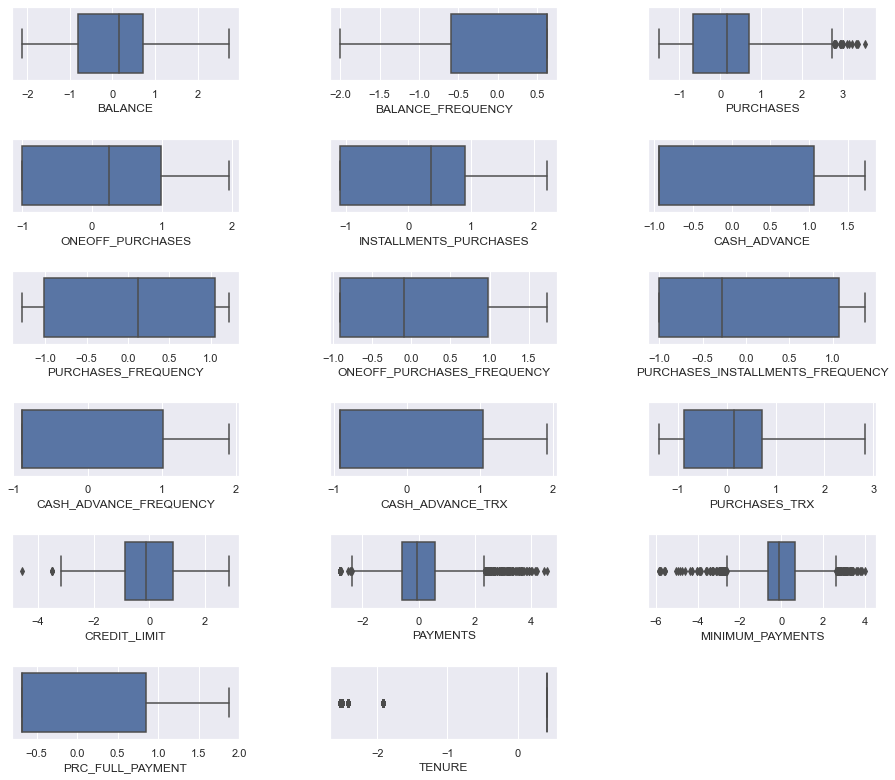

In [29]:
f, axs = plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(df_power.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(df_power[column])

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

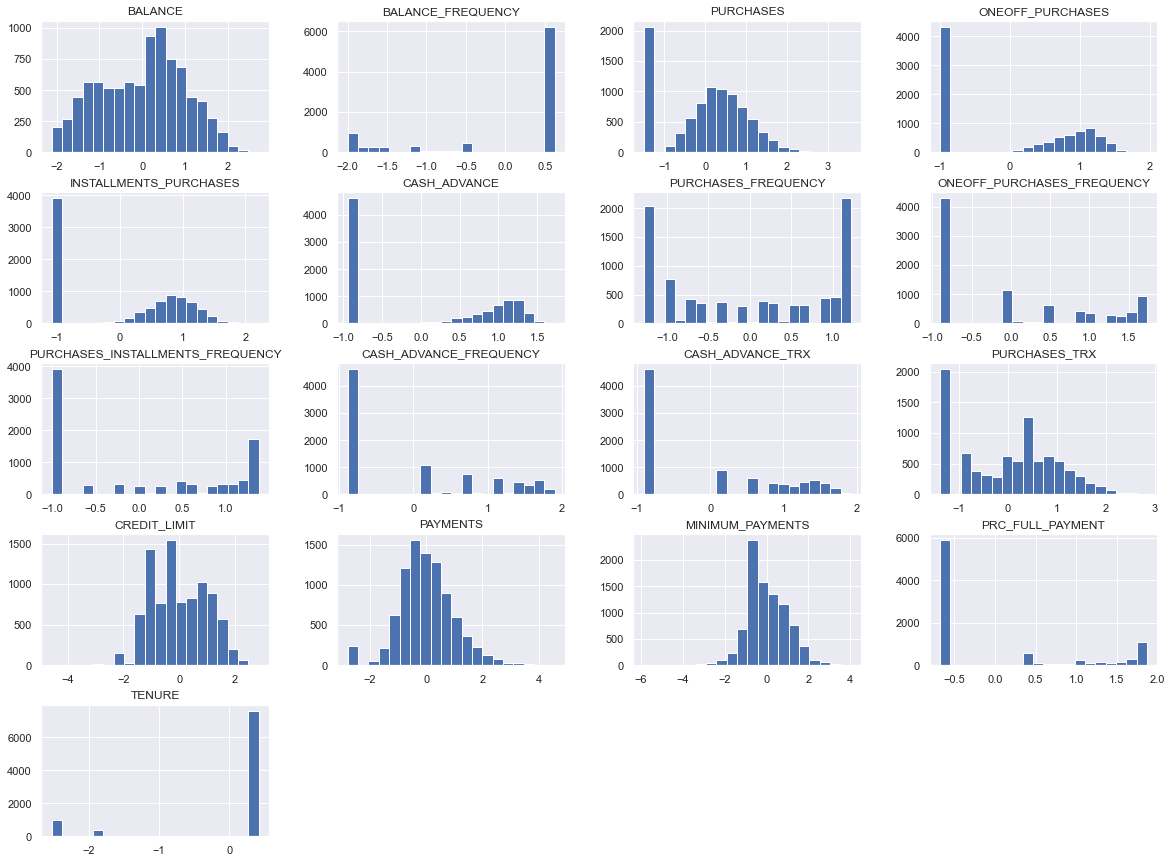

In [30]:
df_power.hist(bins=20, figsize=(20,15))

In [31]:
pd.DataFrame(df_power).skew()

BALANCE                            -0.119428
BALANCE_FREQUENCY                  -1.118938
PURCHASES                          -0.178677
ONEOFF_PURCHASES                    0.115147
INSTALLMENTS_PURCHASES             -0.014843
CASH_ADVANCE                        0.188413
PURCHASES_FREQUENCY                -0.044848
ONEOFF_PURCHASES_FREQUENCY          0.541358
PURCHASES_INSTALLMENTS_FREQUENCY    0.217056
CASH_ADVANCE_FREQUENCY              0.506434
CASH_ADVANCE_TRX                    0.392581
PURCHASES_TRX                       0.006058
CREDIT_LIMIT                       -0.009651
PAYMENTS                            0.124631
MINIMUM_PAYMENTS                   -0.029965
PRC_FULL_PAYMENT                    0.963939
TENURE                             -1.971472
dtype: float64

In [32]:
##### SAVE DATA processing by Power Transformer  #####
df_power.to_csv("../Data/Data_Power.csv",index=False)
########################################

## 4. <a>Features transformation</a>


In [33]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [34]:
#### SCALE Data ####
########################################
#scale_MaxAbs = MaxAbsScaler()
scale_MinMax = MinMaxScaler()
#scale_Standard = StandardScaler()
df_transformed = pd.DataFrame(scale_MinMax.fit_transform(df_NoNull), columns=columns_names)


In [35]:
##### SAVE DATA processing by MinMaxScaling  #####
df_transformed.to_csv("../Data/Data_MinMaxSca.csv",index=False)
########################################

In [36]:
#### SCALE Data from Log Transformer ####
########################################
#scale_MaxAbs = MaxAbsScaler()
scale_MinMax = MinMaxScaler()
#scale_Standard = StandardScaler()
df_transformed_Log = pd.DataFrame(scale_MinMax.fit_transform(df_log), columns=columns_names)


In [37]:
##### SAVE DATA processing by Log + MinMaxScaling  #####
df_transformed_Log.to_csv("../Data/Data_Log_MinMaxSca.csv",index=False)
########################################

In [38]:
#### SCALE Data from Power Transformer ####
########################################
#scale_MaxAbs = MaxAbsScaler()
scale_MinMax = MinMaxScaler()
#scale_Standard = StandardScaler()
df_transformed_Power = pd.DataFrame(scale_MinMax.fit_transform(df_power), columns=columns_names)


In [39]:
##### SAVE DATA processing by Power + MinMaxScaling  #####
df_transformed_Power.to_csv("../Data/Data_Power_MinMaxSca.csv",index=False)
########################################

In [40]:
#### SCALE Data from Power Transformer ####
########################################
#scale_MaxAbs = MaxAbsScaler()
#scale_MinMax = MinMaxScaler()
scale_Standard = StandardScaler()
df_transformed_Power = pd.DataFrame(scale_Standard.fit_transform(df_power), columns=columns_names)


In [41]:
##### SAVE DATA processing by Power + StandardScaling  #####
df_transformed_Power.to_csv("../Data/Data_Power_StandardSca.csv",index=False)
########################################